<a href="https://colab.research.google.com/github/cosez/Dados/blob/main/titanic_tree_v1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Equipe:
##### Guilherme Lopes (gpl2@cin.ufpe.br)
##### Igor Costa (icsea@cin.ufpe.br)
##### Igor Henrique Soares (ihsrp@cin.ufpe.br)
##### José Roberto Fonseca (jrfsj@cin.ufpe.br)
##### Vinícius Galindo Guedes(vgg@cin.ufpe.br)

# Importando as biblotecas necessárias

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Observando nosso dataset

In [ ]:
train_df = pd.read_csv('/content/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Realizando uma análise exploratória dos nossos dados

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

### Podemos ver que temos valores faltando nas classes de cabine, idade e embarcado. Vamos tratar tais valores para tentar melhorar nossa predição.


*   Primeiro como cabine possui uma grande quantidade de valores faltando, podemos concluir que é melhor excluí-la dos nossos dataset



In [ ]:
train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object



*   Com relação a idade como é um valor numérico podemos substituir pela média.
*   Com relaçao a classe embarcados podemos substituir pela moda (S) já que os valores faltando são muito poucos, além disso, podemos já transformar os valores para numéricos.
*   Com relação a fare no dataset de teste podemos substituir pela média.

In [ ]:
df = [train_df, test_df]
for data in df:
  mean = data['Age'].mean()
  data['Age'].fillna(value=mean, inplace=True)
  data['Age'] = data['Age'].astype(int)

  data["Embarked"].fillna(value="S",inplace=True)

  data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
  data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

  mean_Fare = data["Fare"].mean()
  data["Fare"].fillna(value=mean_Fare,inplace=True)



In [ ]:
train_df = train_df.drop('Ticket', axis=1)
test_df = test_df.drop('Ticket', axis=1)

In [ ]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex      

Analisando mais a fundo podemos ver que o título em nome possui informações sobre sexo de uma forma mais detalhada, então podemos criar uma nova feature chamada title

In [ ]:
target_names = np.unique(train_df['Name'])
target_names

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
       'Ali, Mr. Ahmed', 'Ali, Mr. William',
       'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
       'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
       'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
       'Allum, Mr. Owen George',
       'Andersen-Jensen, Miss. Carla Christine Nielsine',
       'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
       'Andersson, Miss. Ebba Iris Alfrida',
       'Andersson, Miss. Ellis Anna Maria',
       'Andersson, Miss. Erna Alexandra',
       'Andersson, Miss. Ingeborg Con

Vamos então utilizar os títulos dos passageiros para poder ter uma análise mais detalhada dos mesmos com a classe title que além de separar por sexo também separa por título

In [ ]:
df = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for data in df:

  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

  data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
  data['Title'] = data['Title'].replace('Mlle', 'Miss')
  data['Title'] = data['Title'].replace('Ms', 'Miss')
  data['Title'] = data['Title'].replace('Mme', 'Mrs')

  data['Title'] = data['Title'].map(titles)

  data['Title'] = data['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [ ]:
train_df = train_df.drop(['Sex'], axis=1)
test_df = test_df.drop(['Sex'], axis=1)

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)
test_df = test_df.drop(['PassengerId'], axis=1)

### Analisando de uma forma mais gráfica agora que tratamos nosso dataset

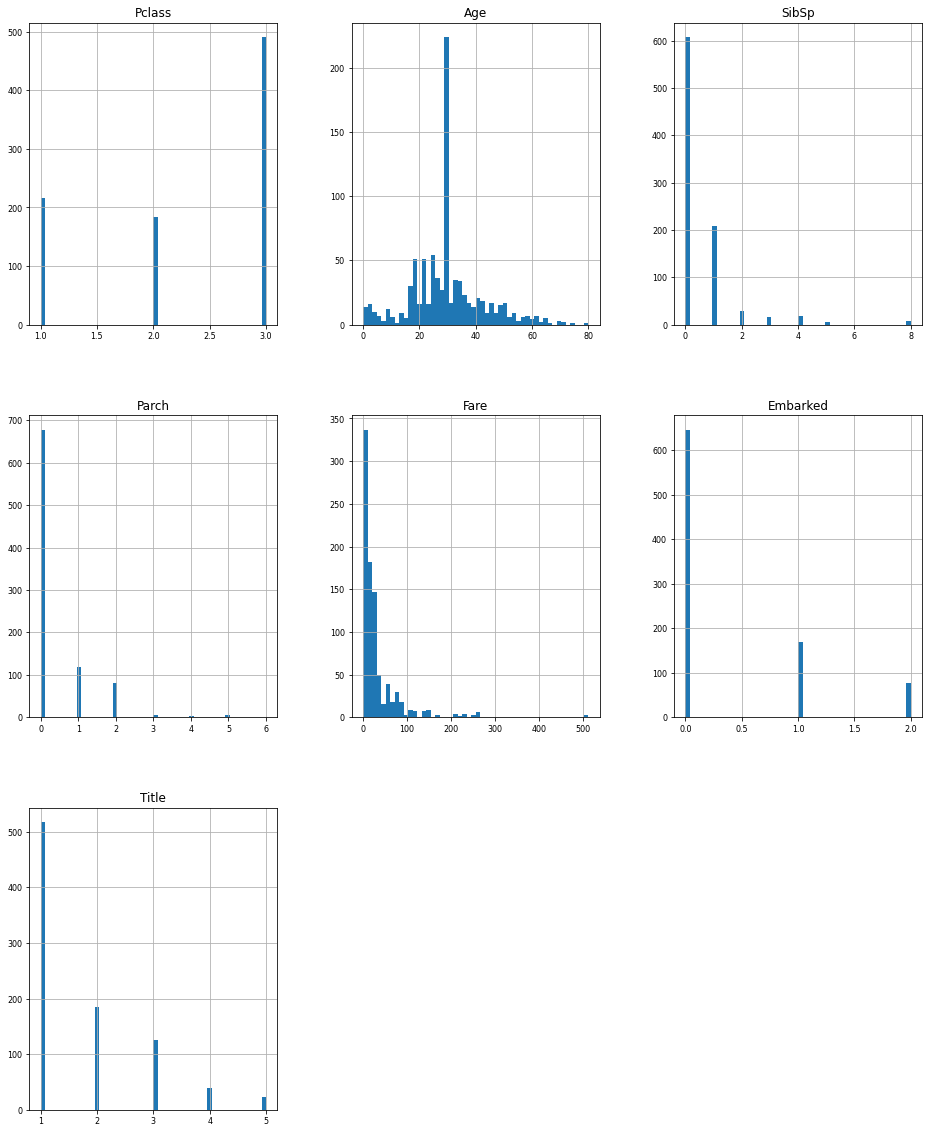

In [ ]:

train_df.drop('Survived', axis=1).hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Vemos que ainda podemos agrupar as idades e tarifas, além disso parch e Sibsp fariam mais sentido como uma única classe chamada de accompanied.

In [ ]:
df = [train_df, test_df]
for data in df:
  data['parentes'] = data['SibSp'] + data['Parch']
  data.loc[data['parentes'] > 0, 'accompanied'] = 0
  data.loc[data['parentes'] == 0, 'accompanied'] = 1
  data['accompanied'] = data['accompanied'].astype(int)

  data['Age'] = data['Age'].astype(int)
  data.loc[ data['Age'] <= 16, 'Age'] = 0
  data.loc[(data['Age'] > 16) & (data['Age'] <= 22), 'Age'] = 1
  data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 2
  data.loc[(data['Age'] > 32) & (data['Age'] <= 40), 'Age'] = 3
  data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 4
  data.loc[(data['Age'] > 66), 'Age'] = 5



In [ ]:
train_df['Age'].value_counts()

29    197
4     141
1     131
3     118
2     106
0     100
30     27
28     27
32     20
31     17
5       7
Name: Age, dtype: int64

# Treinando nosso modelo

In [ ]:

x = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_graphviz
target_names = np.unique(y)
columns = train_df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic.dot",
            feature_names = list(x.columns))

from subprocess import call

call(['dot', '-T', 'png', 'tree_titanic.dot', '-o', 'tree_titanic.png'])

0

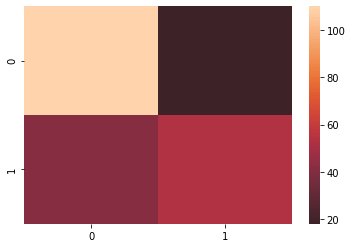

In [ ]:
predicted = tree.predict(X_test)

cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, center=True)
plt.show()

In [ ]:
pd.DataFrame(
    confusion_matrix(y_test, predicted),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,110,18
True Survival,42,53


In [ ]:
report = classification_report(y_test, predicted)
print(report)


              precision    recall  f1-score   support

           0       0.72      0.86      0.79       128
           1       0.75      0.56      0.64        95

    accuracy                           0.73       223
   macro avg       0.74      0.71      0.71       223
weighted avg       0.73      0.73      0.72       223



# Analisando a nossa árvore

In [ ]:
from sklearn.tree import plot_tree
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cm', 'mean']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


[Text(443.97093340611355, 791.4176470588235, 'Title <= 1.5\ngini = 0.466\nsamples = 668\nvalue = [421, 247]'),
 Text(228.6673034934498, 743.4529411764706, 'Pclass <= 1.5\ngini = 0.239\nsamples = 389\nvalue = [335, 54]'),
 Text(94.11681222707423, 695.4882352941177, 'Age <= 3.5\ngini = 0.433\nsamples = 79\nvalue = [54, 25]'),
 Text(29.240174672489083, 647.5235294117647, 'Fare <= 15.644\ngini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(21.930131004366814, 599.5588235294117, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(36.55021834061135, 599.5588235294117, 'Fare <= 35.562\ngini = 0.5\nsamples = 26\nvalue = [13, 13]'),
 Text(21.930131004366814, 551.5941176470587, 'Parch <= 0.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(14.620087336244541, 503.6294117647059, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(29.240174672489083, 503.6294117647059, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(51.1703056768559, 551.5941176470587, 'Fare <= 387.665\ngini = 0.444\nsamples = 

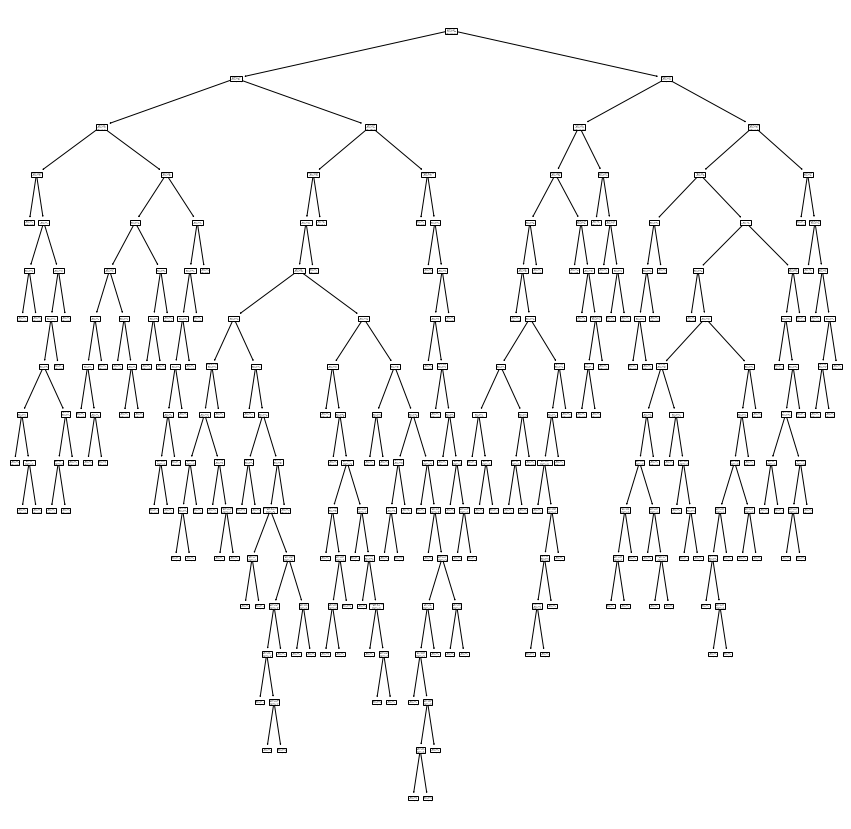

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (15,15))
plot_tree(tree, ax = ax, feature_names=x.columns)

## Analisando nossas métricas

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score
print(np.round(average_precision_score(y_test, predicted),4))
print(np.round(roc_auc_score(y_test, predicted),4))

0.6048
0.7086


# Queremos evitar que a nossa árvore de decisão seja tão grande, com o objetivo de evitar o overfitting

Para isso podemos alterar parametros da nossa árvore de decisão analisando nosso conjunto de dados utilizando métodos como tuning.

## Tuning
O qual alteramos os parametros do Decision Tree Classifier para encontrar os que mais se adequam evitando o overfitting. Para encontrar utilizaremos a otimização bayesiana, mas temos outras opções de como realizar o tuning:


*   Manualmente, testando os parâmetros
*   GridSearch





In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import forest_minimize

In [ ]:
def tune_dtree(params):
    print(params)
    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    max_features = params[3]
    criterion = params[4]

    tree = DecisionTreeClassifier(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  criterion=criterion,
                                  random_state=42,
                                  class_weight='balanced')

    tree.fit(X_train,y_train)

    predicted = tree.predict(X_test)
    print('auc_score', roc_auc_score(y_test, predicted))
    print('average:',average_precision_score(y_test, predicted))
    report = classification_report(y_test, predicted)
    print(report)

    return -average_precision_score(y_test, predicted)


space = [(2,30),(5,30),(1,10),(1,7),('gini','entropy')]

result = forest_minimize(tune_dtree, space, random_state=42, n_random_starts=20,n_calls=50, verbose=1)

Iteration No: 1 started. Evaluating function at random point.
[21, 19, 8, 5, 'entropy']
auc_score 0.7823190789473684
average: 0.6814738508100904
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       128
           1       0.79      0.71      0.74        95

    accuracy                           0.79       223
   macro avg       0.79      0.78      0.79       223
weighted avg       0.79      0.79      0.79       223

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0171
Function value obtained: -0.6815
Current minimum: -0.6815
Iteration No: 2 started. Evaluating function at random point.
[27, 23, 7, 3, 'gini']
auc_score 0.7734786184210527
average: 0.6543351857017187
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       128
           1       0.73      0.76      0.74        95

    accuracy                           0.78       223
   macro avg       0.77      0.77  

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.2894
Function value obtained: -0.7289
Current minimum: -0.7289
Iteration No: 36 started. Searching for the next optimal point.
[28, 26, 10, 4, 'entropy']
auc_score 0.8217105263157894
average: 0.728932650566306
              precision    recall  f1-score   support

           0       0.84      0.88      0.85       128
           1       0.82      0.77      0.79        95

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 0.2883
Function value obtained: -0.7289
Current minimum: -0.7289
Iteration No: 37 started. Searching for the next optimal point.
[23, 28, 10, 4, 'entropy']
auc_score 0.8230674342105263
average: 0.7276001317540143
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       128
           1       0.81      0.78      0.80        95

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 0.2986
Function value obtained: -0.7276
Current minimum: -0.7289
Iteration No: 38 started. Searching for the next optimal point.
[25, 26, 10, 4, 'entropy']
auc_score 0.8217105263157894
average: 0.728932650566306
              precision    recall  f1-score   support

           0       0.84      0.88

In [ ]:
result.x

[28, 26, 10, 4, 'entropy']

Assim de acordo com o modelo bayesiano os parâmetros que geraram o melhor resultado foram max_depth = 28, min_samples_split = 26, min_samples_leaf = 10, max_features = 4 e o algoritmo utilizado entropy

              precision    recall  f1-score   support

           0       0.84      0.88      0.85       128
           1       0.82      0.77      0.79        95

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



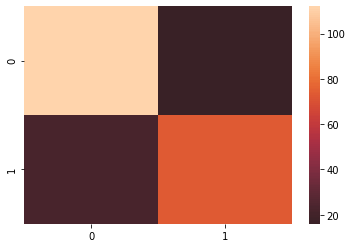

,Predicted Not Survival,Predicted Survival
True Not Survival,112,16
True Survival,22,73


In [ ]:
params = result.x
max_depth = params[0]
min_samples_split = params[1]
min_samples_leaf = params[2]
max_features = params[3]
criterion = params[4]

tree = DecisionTreeClassifier(max_depth=max_depth,
                                  min_samples_split=min_samples_split,
                                  min_samples_leaf=min_samples_leaf,
                                  max_features=max_features,
                                  criterion=criterion,
                                  random_state=42,
                                  class_weight='balanced')
tree.fit(X_train,y_train)
predicted_tree = tree.predict(X_test)

report = classification_report(y_test, predicted_tree)
print(report)



cm = confusion_matrix(y_test, predicted_tree)
sns.heatmap(cm, center=True)
plt.show()

pd.DataFrame(
confusion_matrix(y_test, predicted_tree),
columns=['Predicted Not Survival', 'Predicted Survival'],
index=['True Not Survival', 'True Survival']
)





In [ ]:
target_names = np.unique(y)
columns = test_df.columns
# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "tree_titanic_new.dot",
            feature_names = list(x.columns))

from subprocess import call

call(['dot', '-T', 'png', 'tree_titanic_new.dot', '-o', 'tree_titanic_new.png'])

0

In [ ]:
accuracy_score(y_test, predicted_tree)

0.8295964125560538

# Observando nossa árvore


*   Vemos que agora temos uma profundidade reduzida e o overfitting inicial foi solucionado



[Text(421.18269230769226, 778.3363636363636, 'Title <= 1.5\nentropy = 1.0\nsamples = 668\nvalue = [334.0, 334.0]'),
 Text(209.24999999999997, 704.209090909091, 'Fare <= 26.269\nentropy = 0.752\nsamples = 389\nvalue = [265.772, 73.02]'),
 Text(139.5, 630.0818181818181, 'accompanied <= 0.5\nentropy = 0.599\nsamples = 297\nvalue = [214.204, 36.51]'),
 Text(96.57692307692307, 555.9545454545455, 'Age <= 2.5\nentropy = 0.23\nsamples = 45\nvalue = [34.907, 1.352]'),
 Text(75.11538461538461, 481.8272727272727, 'entropy = 0.475\nsamples = 16\nvalue = [11.9, 1.352]'),
 Text(118.03846153846153, 481.8272727272727, 'entropy = 0.0\nsamples = 29\nvalue = [23.007, 0.0]'),
 Text(182.4230769230769, 555.9545454545455, 'Age <= 30.5\nentropy = 0.644\nsamples = 252\nvalue = [179.297, 35.158]'),
 Text(160.96153846153845, 481.8272727272727, 'Embarked <= 0.5\nentropy = 0.584\nsamples = 241\nvalue = [174.537, 28.397]'),
 Text(107.30769230769229, 407.7, 'Pclass <= 2.5\nentropy = 0.54\nsamples = 196\nvalue = [143

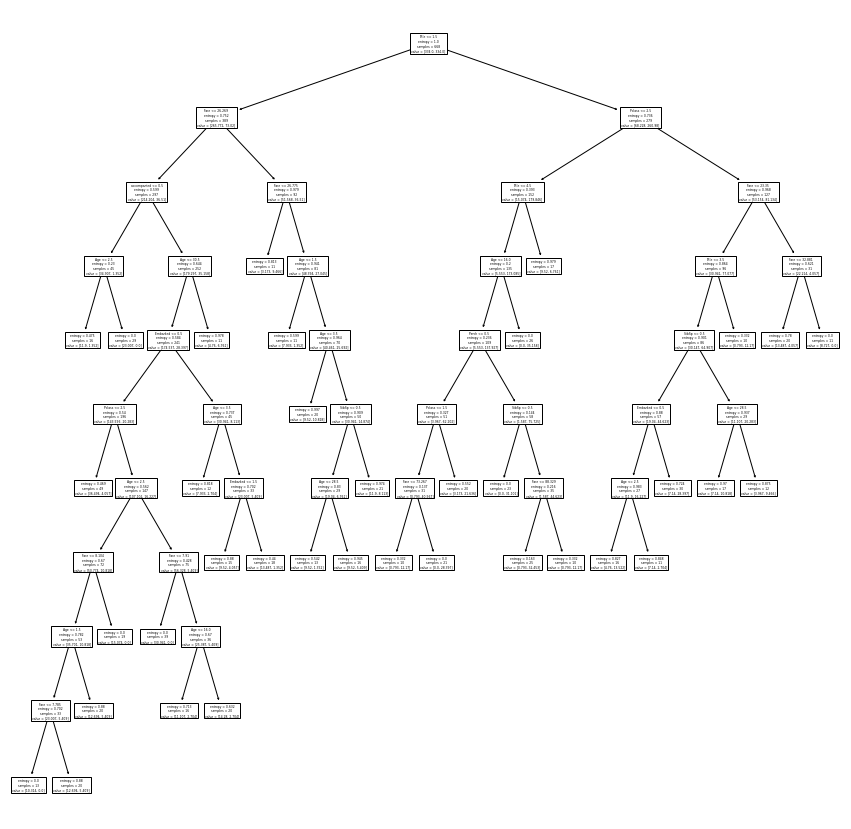

In [ ]:
    fig, ax = pylab.subplots(1, 1, figsize = (15,15))
    plot_tree(tree, ax = ax, feature_names=x.columns)

In [ ]:
import pydot
import graphviz

dot_data = export_graphviz(
        tree,
        out_file=None,
        feature_names=x.columns,
        class_names=['0','1'],
        filled=True, rounded=True,
        proportion=True,
        node_ids=True,
        rotate=False,
        label='all',
        special_characters=True
    )
graph = graphviz.Source(dot_data)
graph

call(['dot', '-T', 'png', 'decision_tree_titanic_new.dot', '-o', 'decision_tree_titanic_new.png'])

0